In [1]:
import pandas as pd
import seaborn as sns
import random
import matplotlib.pyplot as plt
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder
import numpy as np
from sklearn.model_selection import KFold
from sklearn.svm import SVC
from sklearn.metrics import precision_recall_fscore_support as score
#heads=["step","type","amount","nameOrig","oldbalanceOrg","newbalanceOrig","nameDest","oldbalanceDest","newbalanceDest","isFraud","isFlaggedFraud"]
Data = pd.read_csv("fraud_ass_data.csv")
Data.head()
#(Data['isFraud'].value_counts()/len(Data))*100
#x_data=np.array(Data.drop("isFraud",axis=1))
#y_data=np.array(Data["isFraud"])
#X_sample,X_rest,Y_sample,Y_rest=train_test_split(x_data,y_data,test_size=0.97,stratify=y_data)
#data=pd.DataFrame(X_sample, columns=Data.columns.drop('isFraud'))
#data=pd.concat([data,pd.Series(Y_sample).rename('isFraud')], axis=1)
#sampled data ready


C:\Users\Farida Kamel\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:30: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  method='lar', copy_X=True, eps=np.finfo(np.float).eps,
C:\Users\Farida Kamel\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:167: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  method='lar'

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [2]:
(Data['isFraud'].value_counts()/len(Data))*100

0    99.89109
1     0.10891
Name: isFraud, dtype: float64

In [3]:

x_data=Data.drop("isFraud",axis=1)
x_arr=np.empty([len(x_data),10],dtype=object)
x_arr[:] = np.array(x_data)
y_data=Data["isFraud"]
y_arr=np.empty([len(y_data)],dtype=object)
y_arr[:] = np.array(y_data)
X_sample,X_rest,Y_sample,Y_rest=train_test_split(x_arr,y_arr,test_size=0.85,stratify=y_data)
data=pd.DataFrame(X_sample, columns=Data.columns.drop('isFraud'))
data=pd.concat([data,pd.Series(Y_sample).rename('isFraud')], axis=1)
data.head()
#sampled data ready

C:\Users\Farida Kamel\Anaconda3\lib\site-packages\sklearn\utils\__init__.py:806: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return floored.astype(np.int)
C:\Users\Farida Kamel\Anaconda3\lib\site-packages\sklearn\utils\__init__.py:806: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, 

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFlaggedFraud,isFraud
0,14,TRANSFER,1134500.84,C981584139,11608.0,0.0,C626957815,726135.1,2469186.6,0,0
1,18,TRANSFER,247501.05,C1698264691,0.0,0.0,C644138492,3001710.41,3249211.46,0,0
2,35,CASH_IN,327949.53,C1009669854,3890822.14,4218771.67,C810487084,1226454.41,898504.88,0,0
3,33,TRANSFER,1399724.61,C567471523,0.0,0.0,C1065997164,8652364.8,10100000.0,0,0
4,33,PAYMENT,7360.39,C910271401,147044.0,139683.61,M1653479100,0.0,0.0,0,0


In [4]:
(data['isFraud'].value_counts()/len(data))*100 , len(data)

(0    99.891281
 1     0.108719
 Name: isFraud, dtype: float64, 157286)

In [5]:
data['type'].groupby(data['isFraud']).value_counts()

isFraud  type    
0        CASH_OUT    56021
         PAYMENT     53116
         CASH_IN     34087
         TRANSFER    12823
         DEBIT        1068
1        TRANSFER       93
         CASH_OUT       78
Name: type, dtype: int64

In [6]:
#type has an effect so we turn string into int encoding
encoder = OneHotEncoder(handle_unknown='ignore')
encoder_df = pd.DataFrame(encoder.fit_transform(data[['type']]).toarray())
final_df = data.join(encoder_df)

final_df.drop('type', axis=1, inplace=True)

final_df.columns = ["step","amount","nameOrig","oldbalanceOrg","newbalanceOrig","nameDest","oldbalanceDest","newbalanceDest","isFlaggedFraud","isFraud","DEBIT","CASH_OUT","CASH_IN","PAYMENT","TRANSFER"]
print(final_df["isFraud"].value_counts())
final_df.head()

0    157115
1       171
Name: isFraud, dtype: int64


C:\Users\Farida Kamel\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:110: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  X_int = np.zeros((n_samples, n_features), dtype=np.int)
C:\Users\Farida Kamel\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:111: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.2

,step,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFlaggedFraud,isFraud,DEBIT,CASH_OUT,CASH_IN,PAYMENT,TRANSFER
0,14,1134500.84,C981584139,11608.0,0.0,C626957815,726135.1,2469186.6,0,0,0.0,0.0,0.0,0.0,1.0
1,18,247501.05,C1698264691,0.0,0.0,C644138492,3001710.41,3249211.46,0,0,0.0,0.0,0.0,0.0,1.0
2,35,327949.53,C1009669854,3890822.14,4218771.67,C810487084,1226454.41,898504.88,0,0,1.0,0.0,0.0,0.0,0.0
3,33,1399724.61,C567471523,0.0,0.0,C1065997164,8652364.8,10100000.0,0,0,0.0,0.0,0.0,0.0,1.0
4,33,7360.39,C910271401,147044.0,139683.61,M1653479100,0.0,0.0,0,0,0.0,0.0,0.0,1.0,0.0


In [7]:
final_df["isFraud"].value_counts()

0    157115
1       171
Name: isFraud, dtype: int64

In [8]:
#for nameOrig: effect of fitst letter
print(final_df['nameOrig'].str[:1].nunique())

1


In [11]:
#for nameDest: effect of first letter
print(final_df['nameDest'].str[:1].nunique())

2


In [12]:
#check relation between letter and fraud
final_df['nameDest_letter']=final_df['nameDest'].str[:1]
final_df['nameDest_letter']=final_df['nameDest'].str[:1]
final_df.head()


,step,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFlaggedFraud,isFraud,DEBIT,CASH_OUT,CASH_IN,PAYMENT,TRANSFER,nameDest_letter
0,14,1134500.84,C981584139,11608.0,0.0,C626957815,726135.1,2469186.6,0,0,0.0,0.0,0.0,0.0,1.0,C
1,18,247501.05,C1698264691,0.0,0.0,C644138492,3001710.41,3249211.46,0,0,0.0,0.0,0.0,0.0,1.0,C
2,35,327949.53,C1009669854,3890822.14,4218771.67,C810487084,1226454.41,898504.88,0,0,1.0,0.0,0.0,0.0,0.0,C
3,33,1399724.61,C567471523,0.0,0.0,C1065997164,8652364.8,10100000.0,0,0,0.0,0.0,0.0,0.0,1.0,C
4,33,7360.39,C910271401,147044.0,139683.61,M1653479100,0.0,0.0,0,0,0.0,0.0,0.0,1.0,0.0,M


In [13]:
final_df['nameDest_letter'].groupby(final_df['isFraud']).value_counts()

isFraud  nameDest_letter
0        C                  103999
         M                   53116
1        C                     171
Name: nameDest_letter, dtype: int64

In [14]:
#final_df['nameDest'].groupby(final_df['isFraud']).value_counts()

In [15]:
final_df['nameOrig'].groupby(final_df['isFraud']).value_counts()

isFraud  nameOrig   
0        C1136988027    2
         C2103998041    2
         C294362797     2
         C745009740     2
         C1000022742    1
                       ..
1        C920552627     1
         C958487787     1
         C973342461     1
         C979329781     1
         C993318150     1
Name: nameOrig, Length: 157282, dtype: int64

In [16]:
final_df['nameOrig']=final_df['nameOrig'].str[1:]
final_df['nameDest']=final_df['nameDest'].str[1:]

In [17]:
final_df.head()

,step,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFlaggedFraud,isFraud,DEBIT,CASH_OUT,CASH_IN,PAYMENT,TRANSFER,nameDest_letter
0,14,1134500.84,981584139,11608.0,0.0,626957815,726135.1,2469186.6,0,0,0.0,0.0,0.0,0.0,1.0,C
1,18,247501.05,1698264691,0.0,0.0,644138492,3001710.41,3249211.46,0,0,0.0,0.0,0.0,0.0,1.0,C
2,35,327949.53,1009669854,3890822.14,4218771.67,810487084,1226454.41,898504.88,0,0,1.0,0.0,0.0,0.0,0.0,C
3,33,1399724.61,567471523,0.0,0.0,1065997164,8652364.8,10100000.0,0,0,0.0,0.0,0.0,0.0,1.0,C
4,33,7360.39,910271401,147044.0,139683.61,1653479100,0.0,0.0,0,0,0.0,0.0,0.0,1.0,0.0,M


In [32]:
encoder2 = OneHotEncoder(handle_unknown='ignore')
encoder2_df = pd.DataFrame(encoder2.fit_transform(final_df[['nameDest_letter']]).toarray())
df = final_df.join(encoder2_df)

df.drop('nameDest_letter', axis=1, inplace=True)

df.columns = ["step","amount","nameOrig","oldbalanceOrg","newbalanceOrig","nameDest","oldbalanceDest","newbalanceDest","isFlaggedFraud","isFraud","DEBIT","CASH_OUT","CASH_IN","PAYMENT","TRANSFER","Dest_C","Dest_M"]
df.head()

C:\Users\Farida Kamel\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:110: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  X_int = np.zeros((n_samples, n_features), dtype=np.int)
C:\Users\Farida Kamel\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:111: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.2

,step,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFlaggedFraud,isFraud,DEBIT,CASH_OUT,CASH_IN,PAYMENT,TRANSFER,Dest_C,Dest_M
0,14,1134500.84,981584139,11608.0,0.0,626957815,726135.1,2469186.6,0,0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
1,18,247501.05,1698264691,0.0,0.0,644138492,3001710.41,3249211.46,0,0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
2,35,327949.53,1009669854,3890822.14,4218771.67,810487084,1226454.41,898504.88,0,0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,33,1399724.61,567471523,0.0,0.0,1065997164,8652364.8,10100000.0,0,0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
4,33,7360.39,910271401,147044.0,139683.61,1653479100,0.0,0.0,0,0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [33]:


data1 = np.array(df.drop("isFraud", axis=1))
scaler = StandardScaler()
scaler.fit(data1)
df_scaled=scaler.transform(data1)
scaled_data=pd.DataFrame(df_scaled,columns=(df.drop("isFraud", axis=1)).columns)
scaled_data=scaled_data.drop("isFlaggedFraud", axis=1)
scaled_data.head()

,step,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,DEBIT,CASH_OUT,CASH_IN,PAYMENT,TRANSFER,Dest_C,Dest_M
0,-0.832026,3.725158,-0.147856,-0.288946,-0.295893,-0.713572,-0.107910,0.571498,-0.526006,-0.744587,-0.082684,-0.714071,3.343293,0.714071,-0.714071
1,-0.575685,0.341152,1.008419,-0.292859,-0.295893,-0.685879,0.892543,0.898206,-0.526006,-0.744587,-0.082684,-0.714071,3.343293,0.714071,-0.714071
2,0.513766,0.648072,-0.102543,1.018570,1.108697,-0.417747,0.112055,-0.086371,1.901119,-0.744587,-0.082684,-0.714071,-0.299106,0.714071,-0.714071
3,0.385595,4.737017,-0.815976,-0.292859,-0.295893,-0.005898,3.376845,3.767611,-0.526006,-0.744587,-0.082684,-0.714071,3.343293,0.714071,-0.714071
4,0.385595,-0.575012,-0.262910,-0.243297,-0.249387,0.941046,-0.427154,-0.462703,-0.526006,-0.744587,-0.082684,1.400421,-0.299106,-1.400421,1.400421


In [40]:
x_data=scaled_data
y_data=pd.DataFrame(data=df["isFraud"], dtype=np.int8)
y_data

,isFraud
0,0
1,0
2,0
3,0
4,0
...,...
157281,0
157282,0
157283,0
157284,0


In [41]:
def reg(best_Xtrain,best_Ytrain,best_Xcross,best_Ycross,Degree):
    c=np.linspace(0.50, 1.0, num=15)
    max_Recall=[]
    for i in c:
            model = SVC(kernel='poly', C=i, degree=Degree)
            model.fit(best_Xtrain,best_Ytrain)
            y_pred_cross=model.predict(best_Xcross)
            precision,recall,fscore,support=score(best_Ycross,y_pred_cross,average='macro')
            max_Recall.append(recall)
    best_parameter=c[max_Recall.index(max(max_Recall))]
    best_recall=max(max_Recall)
    return best_recall,best_parameter

In [42]:
def plot(recall_folds,penalty,degree):
    plt.figure()
    plt.plot(range(1,6),recall_folds)
    plt.ylabel("Recall")
    plt.xlabel("Folds")
    plt.title("Polynomial degree: "+ str(degree) + ", Regularization type= "+ str(penalty))

In [49]:
def SVM():
    X_trainandcross, X_test, y_trainandcross, y_test = train_test_split(np.array(x_data),np.array(y_data),
                                                        test_size=0.25,stratify=y_data)

 
    cv = KFold(n_splits=5,shuffle=True)
    # create model
    max_recall=0
    best_degree=0
    recall_folds=[]
    for i in range(1,6):
        
        #recall_folds=[]
        
        for train_index, test_index in cv.split(X_trainandcross):
            
            
            X_train, X_cross = X_trainandcross[train_index], X_trainandcross[test_index]
            y_train, y_cross = y_trainandcross[train_index], y_trainandcross[test_index]
            
            model = SVC(kernel='poly', degree=i)
            model.fit(X_train, y_train)
            

            y_pred_cross=model.predict(X_cross)
            y_pred_train=model.predict(X_train)
          
            precision,recall,fscore,support=score(y_cross,y_pred_cross,average='macro')

            #recall= takes into consideration FN, most important here, the highest the better
            recall_folds.append(recall)

            if recall>=max(recall_folds):
                max_recall=recall
                best_degree=i
                best_Xtrain=X_train
                best_Ytrain=y_train
                best_Xcross=X_cross
                best_Ycross=y_cross
            
    max_recall,penalty=reg(best_Xtrain,best_Ytrain,best_Xcross,best_Ycross,best_degree)
        
    plot( recall_folds[(best_degree-1)*5:(best_degree*5)],penalty,best_degree)
    return best_degree,max_recall,penalty,best_Xtrain,best_Ytrain,X_test,y_test


C:\Users\Farida Kamel\Anaconda3\lib\site-packages\sklearn\utils\__init__.py:806: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return floored.astype(np.int)
C:\Users\Farida Kamel\Anaconda3\lib\site-packages\sklearn\utils\__init__.py:806: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, 

C:\Users\Farida Kamel\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:102: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  test_mask = np.zeros(_num_samples(X), dtype=np.bool)
C:\Users\Farida Kamel\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Farida Kamel\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set ga

C:\Users\Farida Kamel\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:102: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  test_mask = np.zeros(_num_samples(X), dtype=np.bool)
C:\Users\Farida Kamel\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Farida Kamel\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set ga

C:\Users\Farida Kamel\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:442: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  fold_sizes = np.full(n_splits, n_samples // n_splits, dtype=np.int)
C:\Users\Farida Kamel\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:102: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in

C:\Users\Farida Kamel\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Farida Kamel\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Farida Kamel\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Farida Kamel\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' t

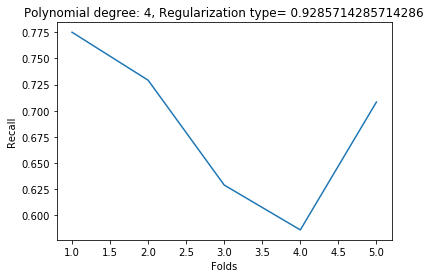

In [50]:
best_degree,maxRecall,penalty,best_Xtrain,best_Ytrain,X_test,y_test=SVM()

In [51]:
def test(Best_degree,penalty,best_Xtrain,best_Ytrain, X_test,y_test):
    model = SVC(kernel='poly', degree=Best_degree, C=penalty)
    model.fit(best_Xtrain,best_Ytrain)
    y_pred_test=model.predict(X_test)
    precision,recall,fscore,support=score(y_test,y_pred_test,average='macro')
    #print("hi", y_test.sum())
    return recall

In [52]:
recall_test=test(best_degree,penalty,best_Xtrain,best_Ytrain, X_test,y_test)
recall_test

C:\Users\Farida Kamel\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Farida Kamel\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.6046257038940862

In [53]:
def RegularizationKernels(best_Xtrain_model,best_Ytrain_model,best_Xcross_model,best_Ycross_model,i):
    c=np.linspace(0.5, 1.0, num=25)
    max_Recall=[]
    for z in c:
            model = SVC(kernel=i, C=z)
            model.fit(best_Xtrain_model,best_Ytrain_model)
            y_pred_cross=model.predict(best_Xcross_model)
            precision,recall,fscore,support=score(best_Ycross_model,y_pred_cross,average='macro')
            max_Recall.append(recall)
    best_parameter=c[max_Recall.index(max(max_Recall))]
    best_recall=max(max_Recall)
    return best_recall,best_parameter

In [55]:
def plotk(recall_folds,penalty,kernel):
    plt.figure()
    plt.plot(range(1,6),recall_folds)
    plt.ylabel("Recall")
    plt.xlabel("Folds")
    plt.title("Kernel: "+ kernel + ", Regularization type= "+ str(penalty))

In [63]:
def SVMkernel():
    X_trainandcross, X_test, y_trainandcross, y_test = train_test_split(np.array(x_data),np.array(y_data),
                                                        test_size=0.25,stratify=y_data)

 
    kernels=['linear','sigmoid','rbf']
    cv = KFold(n_splits=5,shuffle=True)
    # create model
    max_recall=0
    kernel_idx=0
    recall_folds=[]
    z=0
    best_z=0
    for i in kernels:
        
        #recall_folds=[]
        z=z+1
        for train_index, test_index in cv.split(X_trainandcross):
            
            
            X_train, X_cross = X_trainandcross[train_index], X_trainandcross[test_index]
            y_train, y_cross = y_trainandcross[train_index], y_trainandcross[test_index]
            
            model = SVC(kernel=i)
            model.fit(X_train, y_train)
            

            y_pred_cross=model.predict(X_cross)
            y_pred_train=model.predict(X_train)
          
            precision,recall,fscore,support=score(y_cross,y_pred_cross,average='macro')

            #recall= takes into consideration FN, most important here, the highest the better
            recall_folds.append(recall)

            if recall>=max(recall_folds):
                max_recall=recall
                kernel_idx=i
                best_z=z
                best_Xtrain=X_train
                best_Ytrain=y_train
                best_Xcross=X_cross
                best_Ycross=y_cross
            
    max_recall,penalty=RegularizationKernels(best_Xtrain,best_Ytrain,best_Xcross,best_Ycross,kernel_idx)
        
    plotk( recall_folds[(best_z-1)*5:(best_z*5)],penalty,kernel_idx)
    return kernel_idx,max_recall,penalty,best_Xtrain,best_Ytrain,X_test,y_test


C:\Users\Farida Kamel\Anaconda3\lib\site-packages\sklearn\utils\__init__.py:806: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return floored.astype(np.int)
C:\Users\Farida Kamel\Anaconda3\lib\site-packages\sklearn\utils\__init__.py:806: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, 

C:\Users\Farida Kamel\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:102: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  test_mask = np.zeros(_num_samples(X), dtype=np.bool)
C:\Users\Farida Kamel\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Farida Kamel\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set ga

C:\Users\Farida Kamel\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Farida Kamel\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Farida Kamel\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Farida Kamel\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

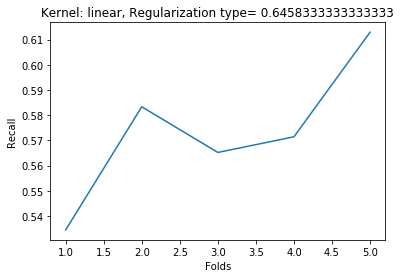

In [64]:
Best_Kernel,MaxRecall,penalty,best_Xtrain_model,best_Ytrain_model,X_test,y_test=SVMkernel()

In [65]:
def testKernels(Best_Kernel,penalty,best_Xtrain_model,best_Ytrain_model, X_test,y_test):
    model = SVC(kernel= Best_Kernel, C=penalty)
    model.fit(best_Xtrain_model,best_Ytrain_model)
    y_pred_test=model.predict(X_test)
    precision,recall,fscore,support=score(y_test,y_pred_test,average='macro')
    #print("hi", y_test.sum())
    return recall


In [66]:
recall_test=testKernels(Best_Kernel,penalty,best_Xtrain_model,best_Ytrain_model, X_test,y_test)
recall_test

C:\Users\Farida Kamel\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.5813953488372093